In [1]:
from SpinTools.spinhamiltonian import spinhamiltonian as sh
import numpy as np
from scipy.constants import physical_constants as spc
from scipy.constants import constants as sc
import itertools

h = spc["Planck constant"][0]

ham = sh.SpinHamiltonian("P")
# Bz = np.array([1])

# Bz = ham.get_field_sweep(bmin=0,bmax=1,bnum=10)
# energy = ham.calculate_energy(Bz)

In [2]:
# np.set_printoptions(suppress=False,precision=3)
# H = ham.get_hamiltonian([0,0,1]) / h / 1e09

### Decorator Functions

In [3]:
def decorator(gamma_function):
    def wrapper_function(*args,**kwargs):
        return gamma_function(*args,**kwargs)
    return wrapper_function

@decorator
def zeeman(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

# @decorator
# def gamma(row,eigvec,hdrive):
#     return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,row].conjugate(), 
#                 np.matmul(hdrive,eigvec[:,col]))), range(row+1,len(eigvec))))

@decorator
def gamma(row,eigvec,hdrive):
    return list(map(lambda col : 1e24*abs(np.matmul(eigvec[:,col].conjugate(), 
                np.matmul(hdrive,eigvec[:,row]))), range(row+1,len(eigvec))))

@decorator
def hamiltonian(Bz):
    return ham.get_hamiltonian([0,0,Bz]) / h / 1e09
#     return ham.hyperfine()

@decorator
def estate(H):
    return np.linalg.eig(H)

@decorator
def E(evals):
    return evals[1] - evals[0]

def get_gamma_values(gam):
    gam = np.array([x for x in gam for x in x])
    gam = list(itertools.chain.from_iterable(gam))
    return list(filter(lambda a: a != 0, gam))

### Now for field sweep
A decorator is appropriate here I think

In [4]:
b = np.arange(0,1,0.01)

H = list(map(hamiltonian,b)) # Get spin hamiltonian
Hds = zeeman(1) # Get perturbation hamiltonian
e = list(map(estate,H)) # get eigenstates

# Get transition rate
gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

# Flatten transition rates and give only the values
gam = get_gamma_values(gam)

# Get eigenvalues for each matrix element
evals = [e[i][0] for i in range(len(b))]
energy = [E(evals[i]) for i in range(len(b))]

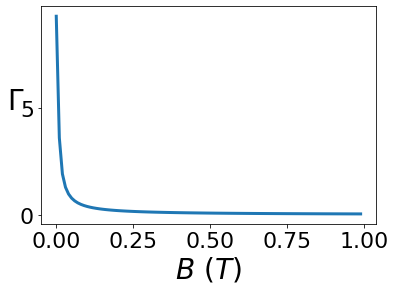

In [6]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],gam)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$\Gamma$',rotation=0)
plt.show()

In [16]:
np.set_printoptions(suppress=False,precision=3)
np.matrix(e[1][1])

matrix([[-0.   -0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
        [ 0.198-0.j,  0.98 +0.j,  0.   +0.j,  0.   +0.j],
        [ 0.98 +0.j, -0.198+0.j,  0.   +0.j,  0.   +0.j],
        [-0.   -0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j]])

In [43]:
c

matrix([[-0.   -0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
        [ 0.198-0.j,  0.98 +0.j,  0.   +0.j,  0.   +0.j],
        [ 0.98 +0.j, -0.198+0.j,  0.   +0.j,  0.   +0.j],
        [-0.   -0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j]])

In [45]:
np.matmul(np.matrix(e[1][1]),np.matmul(Hds,np.matrix(e[1][1]))

matrix([[ 0.000e+00+0.j,  0.000e+00+0.j,  9.269e-24+0.j,  0.000e+00+0.j],
        [ 1.831e-24+0.j, -9.087e-24+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 9.087e-24+0.j,  1.831e-24+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j, -9.269e-24+0.j]])

In [93]:
i = np.matrix(e[1][1][:,0])
f = np.matrix(e[1][1][:,1])

i

matrix([[-0.   -0.j,  0.198-0.j,  0.98 +0.j, -0.   -0.j]])

In [84]:
a = np.matrix('1; -2j; 0j; 4j')

In [85]:
b = np.matrix('1; -2j; 0j; 4j').H

In [89]:
np.matmul(b,np.matmul(Hds,a))

matrix([[-1.761e-22+0.j]])

In [97]:
states = e[1][1]
states

array([[-0.   -0.j,  0.   +0.j,  1.   +0.j,  0.   +0.j],
       [ 0.198-0.j,  0.98 +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.98 +0.j, -0.198+0.j,  0.   +0.j,  0.   +0.j],
       [-0.   -0.j,  0.   +0.j,  0.   +0.j,  1.   +0.j]])

In [105]:
np.squeeze(np.matrix(states[:,1]).H) * Hds * states[:,0]

ValueError: shapes (1,4) and (1,4) not aligned: 4 (dim 1) != 1 (dim 0)

In [129]:
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,1]).H))[0], np.matmul(Hds,states[:,0])) / h / 1e09)
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,1]).conjugate()))[0], np.matmul(Hds,states[:,0])) / h / 1e09)

(-5.417886296442065+0j)
(-5.417886296442065+0j)


In [130]:
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,2]).H))[0], np.matmul(Hds,states[:,1])) / h / 1e09)
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,2]).conjugate()))[0], np.matmul(Hds,states[:,1])) / h / 1e09)

0j
0j


In [131]:
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,3]).H))[0], np.matmul(Hds,states[:,2])) / h / 1e09)
print(np.matmul(np.array(np.squeeze(np.matrix(states[:,3]).conjugate()))[0], np.matmul(Hds,states[:,2])) / h / 1e09)

0j
0j


In [126]:
estate = np.linalg.eig(H)
Hdrive = ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

NameError: name 'Bz' is not defined

In [125]:
e00 = np.matmul(estate[1][:,0].conjugate(), np.matmul(Hdrive,estate[1][:,1]))
e01 = np.matmul(estate[1][:,0].conjugate(), np.matmul(Hdrive,estate[1][:,2]))
e02 = np.matmul(estate[1][:,0].conjugate(), np.matmul(Hdrive,estate[1][:,3]))

e10 = np.matmul(estate[1][:,1].conjugate(), np.matmul(Hdrive,estate[1][:,2]))
e11 = np.matmul(estate[1][:,1].conjugate(), np.matmul(Hdrive,estate[1][:,3]))

e20 = np.matmul(estate[1][:,2].conjugate(), np.matmul(Hdrive,estate[1][:,3]))

TypeError: 'function' object is not subscriptable

In [107]:
gamma0 = 1e24*abs(e0)
gamma1 = 1e24*abs(e1)
gamma2 = 1e24*abs(e2)

In [100]:
E = estate[0][1] - estate[0][0]

In [115]:
E,gamma0

((-27.978705808716015+0j), 0.03893775704088363)

### Now Tidying that up

In [280]:
estate = np.linalg.eig(H)
eigval = estate[0]
eigvec = estate[1]

In [20]:
gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]
gam = get_gamma_values(gam)

In [31]:
list(map(gamma(range(len(Hds)),e,Hds),(range(len(Hds)), range(len(Hds)), range(len(b)))))
# gamma()

TypeError: unsupported operand type(s) for +: 'range' and 'int'

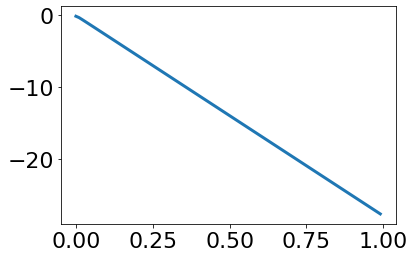

In [76]:
plt.plot(b,energy)

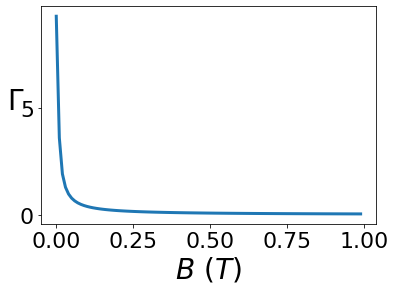

In [81]:
from matplotlib import pyplot as plt
plt.plot(b[0:len(b)],gam)
plt.xlabel('$B$ ($T$)')
plt.ylabel('$\Gamma$',rotation=0)
plt.show()

In [23]:
evals = [e[i][0] for i in range(len(b))]
# E = [abs(evals[i][1] - evals[i][0]) for i in range(len(b))]
E = [evals[i][1] - evals[i][0] for i in range(len(b))]

/Users/garethjones/anaconda3/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


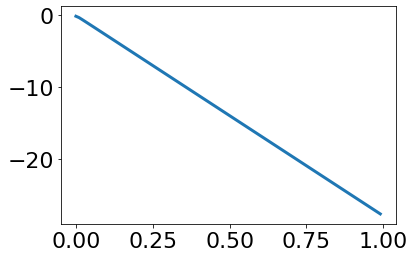

In [24]:
plt.plot(b,E)
# plt.plot(b,-1*np.array(E))

In [430]:
estate = np.linalg.eig(H)
eigval = estate[0]
eigvec = estate[1]

hdrive = ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

array([ 13.96 +0.j, -14.019+0.j,  14.019+0.j, -13.96 +0.j])

In [11]:
def myfunc(a, b):
    return a + b

x = map(myfunc, ('apple', 'banana', 'cherry'), ('orange', 'lemon', 'pineapple'))

In [12]:
list(x)

['appleorange', 'bananalemon', 'cherrypineapple']

In [13]:
def zeeman(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

In [17]:
b = np.arange(0,1,0.01)
z = list(map(zeeman,b))

In [21]:
z[2]

array([[ 1.85387229e-25+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -1.85387229e-25+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  1.85387229e-25+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -1.85387229e-25+0.j]])

In [33]:
def add(x, y):
    return(x + y)

list1 = [1, 2, 3]
list2 = [3, 4, 5]
[add(x, y) for x, y in zip(list1, list2)]

[4, 6, 8]

In [37]:
[gamma(row,e,h) for row,e,h in zip(range(1,4),e,Hds)]

[[], [], []]

In [46]:
H = list(map(hamiltonian,b)) # Get spin hamiltonian
Hds = zeeman(1) # Get perturbation hamiltonian
e = list(map(estate,H)) # get eigenstates

gam = [[gamma(i,e[k][1],Hds) for i in range(len(Hds[0]))] for k in range(len(b))]

In [51]:
[gamma(i,e[k][1],Hds) for i,k in zip(range(len(b)),range(len(Hds)))]

[[9.269361431959018, 0.0, 0.0], [0.0, 0.0], [0.0], []]

In [54]:
list(zip(range(len(Hds))))

[(0,), (1,), (2,), (3,)]

In [82]:
gam[0]

9.269361431959018

In [ ]:
def decorator2(gamma_function,blist):
    def wrapper_function(*args,**kwargs):
        return gamma_function(*args,**kwargs)
    return wrapper_function

@decorator
def zeeman2(Bz):
    return ham.electron_zeeman([0,0,Bz]) + ham.nuclear_zeeman([0,0,Bz])

In [523]:
-1*np.array(E)

array([-0.118, -0.118, -0.118, -0.118, -0.118, -0.118, -0.119, -0.119,
       -0.12 , -0.12 , -0.121, -0.121, -0.122, -0.123, -0.124, -0.125,
       -0.126, -0.127, -0.128, -0.129, -0.13 , -0.131, -0.133, -0.134,
       -0.135, -0.137, -0.138, -0.14 , -0.141, -0.143, -0.144, -0.146,
       -0.148, -0.149, -0.151, -0.153, -0.155, -0.157, -0.158, -0.16 ,
       -0.162, -0.164, -0.166, -0.168, -0.17 , -0.172, -0.174, -0.176,
       -0.178, -0.181, -0.183, -0.185, -0.187, -0.189, -0.191, -0.194,
       -0.196, -0.198, -0.2  , -0.203, -0.205, -0.207, -0.21 , -0.212,
       -0.214, -0.217, -0.219, -0.221, -0.224, -0.226, -0.228, -0.231,
       -0.233, -0.236, -0.238, -0.241, -0.243, -0.245, -0.248, -0.25 ,
       -0.253, -0.255, -0.258, -0.26 , -0.263, -0.265, -0.268, -0.27 ,
       -0.273, -0.275, -0.278, -0.28 , -0.283, -0.286, -0.288, -0.291,
       -0.293, -0.296, -0.298, -0.301, -0.303, -0.306, -0.309, -0.311,
       -0.314, -0.316, -0.319, -0.322, -0.324, -0.327, -0.329, -0.332,
      

In [492]:
gam

[0.0009266736092949122,
 0.001851774687993314,
 0.002773744013004675,
 0.0036910487144677273,
 0.00460219480713295,
 0.005505738972787613,
 0.0064002993847895335,
 0.007284565397832743,
 0.008157305962844074,
 0.009017376666582146,
 0.009863725336216362,
 0.01069539618912016,
 0.011511532545720977,
 0.012311378157175255,
 0.01309427722886396,
 0.013859673244559334,
 0.014607106714262146,
 0.01533621198113038,
 0.016046713229865117,
 0.01673841984085327,
 0.017411221231913774,
 0.018065081323373307,
 0.01870003275317487,
 0.0193161709575558,
 0.01991364822024082,
 0.02049266777972796,
 0.02105347807066375,
 0.021596367161973964,
 0.022121657441704284,
 0.0226297005867055,
 0.023120872844555464,
 0.02359557064555666,
 0.024054206554329185,
 0.024497205563430612,
 0.024925001725530364,
 0.02533803511587252,
 0.02573674911298627,
 0.02612158798273764,
 0.026492994748755248,
 0.026851409330891137,
 0.027197266932593236,
 0.027530996657766982,
 0.02785302033779961,
 0.028163751549830588,
 0.

In [432]:
ham.get_hamiltonian([0,0,1])

array([[ 9.289e-24+0.j,  0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
       [ 0.000e+00+0.j, -9.289e-24+0.j,  3.894e-26+0.j,  0.000e+00+0.j],
       [ 0.000e+00+0.j,  3.894e-26+0.j,  9.250e-24+0.j,  0.000e+00+0.j],
       [ 0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j, -9.250e-24+0.j]])

In [452]:
gam

[[[0.0, 0.0, 0.0], [0.0, 0.0], [0.0], []],
 [[0.03893775704088363, 0.0, 0.0], [0.0, 0.0], [0.0], []],
 [[0.03893801470191339, 0.0, 0.0], [0.0, 0.0], [0.0], []]]

In [461]:
gam

[0.03893775704088363, 0.03893801470191339]

In [460]:
gam = list(filter(lambda a: a != 0, gam))

In [458]:
gam = list(itertools.chain.from_iterable(gam))

In [456]:


# gam = [[gamma(i,Hds[k]) for i in range(len(Hds[0]))] for k in range(len(b))]
gam = np.array([x for x in gam for x in x])

gam = list(itertools.chain.from_iterable(gam))
# gam = list(filter(lambda a: a != 0, gam))

In [440]:
H

[array([[ 0.029+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j],
        [ 0.   +0.j, -0.029+0.j,  0.059+0.j,  0.   +0.j],
        [ 0.   +0.j,  0.059+0.j, -0.029+0.j,  0.   +0.j],
        [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.029+0.j]]),
 array([[ 14.019+0.j,   0.   +0.j,   0.   +0.j,   0.   +0.j],
        [  0.   +0.j, -14.019+0.j,   0.059+0.j,   0.   +0.j],
        [  0.   +0.j,   0.059+0.j,  13.96 +0.j,   0.   +0.j],
        [  0.   +0.j,   0.   +0.j,   0.   +0.j, -13.96 +0.j]]),
 array([[ 28.008+0.j,   0.   +0.j,   0.   +0.j,   0.   +0.j],
        [  0.   +0.j, -28.008+0.j,   0.059+0.j,   0.   +0.j],
        [  0.   +0.j,   0.059+0.j,  27.949+0.j,   0.   +0.j],
        [  0.   +0.j,   0.   +0.j,   0.   +0.j, -27.949+0.j]])]

In [412]:
gam

[0.03893775704088363,
 0.07787551408176727,
 0.11681327112265089,
 0.15575102816353453,
 0.19468878520441818,
 0.23362654224530177,
 0.27256429928618553,
 0.31150205632706907,
 0.3504398133679527,
 0.38937757040883636,
 0.4283153274497201,
 0.46725308449060354,
 0.5061908415314873,
 0.5451285985723711,
 0.5840663556132546,
 0.6230041126541381,
 0.6619418696950219,
 0.7008796267359054,
 0.7398173837767891,
 0.7787551408176727,
 0.8176928978585563,
 0.8566306548994402,
 0.8955684119403237,
 0.9345061689812071,
 0.9734439260220908,
 1.0123816830629746,
 1.0513194401038581,
 1.0902571971447421,
 1.1291949541856252,
 1.1681327112265092,
 1.207070468267393,
 1.2460082253082763,
 1.28494598234916,
 1.3238837393900438,
 1.3628214964309273,
 1.4017592534718109,
 1.4406970105126944,
 1.4796347675535781,
 1.5185725245944617,
 1.5575102816353454,
 1.5964480386762292,
 1.6353857957171125,
 1.6743235527579963,
 1.7132613097988805,
 1.7521990668397638,
 1.7911368238806473,
 1.8300745809215306,
 1.869

In [408]:
%%timeit
print('hi'
      

2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


In [356]:
gam = [gamma(i,Hds[]) for i in range(len(Hds))]
gam = np.array([x for x in gam for x in x])
gam[np.nonzero(gam)][0]

SyntaxError: invalid syntax (<ipython-input-356-11a7a9bd5d4d>, line 1)

In [374]:
list(flat)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [371]:
L1

[[1, 2, 3], [4, 5], [6, 7, 8, 9]]

In [372]:
L1=[[1,2,3],[4,5],[6,7,8,9]]
import itertools
flat=itertools.chain.from_iterable(L1)
# print (list(flat))

In [404]:
# gam
list(filter(lambda a: a != 0, gam))

[0.03893775704088363, 0.07787551408176727, 0.11681327112265089]

In [331]:
gam = np.array([x for x in gam for x in x])

TypeError: 'numpy.float64' object is not iterable

array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

[array([[0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]]),
 array([[ 9.269e-24+0.j,  0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j, -9.269e-24+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  9.269e-24+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j, -9.269e-24+0.j]]),
 array([[ 1.854e-23+0.j,  0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j, -1.854e-23+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  1.854e-23+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j, -1.854e-23+0.j]]),
 array([[ 2.781e-23+0.j,  0.000e+00+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j, -2.781e-23+0.j,  0.000e+00+0.j,  0.000e+00+0.j],
        [ 0.000e+00+0.j,  0.000e+00+0.j,  2.781e-23+0.j,  0.000e+00+0.j],
        [ 0.

In [135]:
reduce((lambda m: np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,m]))),[1,2,3])

TypeError: <lambda>() takes 1 positional argument but 2 were given

In [131]:
from functools import reduce
product = reduce((lambda x, y: x * y), [1, 2, 3, 4])

In [161]:
mapper2

[0j]

In [160]:
mapper1

[0j, 0j]

In [190]:
mapper(2,3)

[0j]

In [203]:
[gamma(i) for i in range(3)]


[[(-3.8937757040883635e-26+0j), 0j, 0j], [0j, 0j], [0j]]

In [120]:
e00 = np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,1]))
e01 = np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,2]))
e02 = np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,3]))

e10 = np.matmul(eigvec[:,1].conjugate(), np.matmul(Hdrive,eigvec[:,2]))
e11 = np.matmul(eigvec[:x,1].conjugate(), np.matmul(Hdrive,eigvec[:,3]))

e20 = np.matmul(eigvec[:,2].conjugate(), np.matmul(Hdrive,eigvec[:,3]))

In [124]:
[np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,i])) for i in range(1,4)]
[np.matmul(eigvec[:,1].conjugate(), np.matmul(Hdrive,eigvec[:,i])) for i in range(2,4)]
[np.matmul(eigvec[:,2].conjugate(), np.matmul(Hdrive,eigvec[:,i])) for i in range(3,4)]

[0j]

In [162]:
mapper0 = list(map(lambda m : np.matmul(eigvec[:,0].conjugate(), np.matmul(Hdrive,eigvec[:,m])), range(1,4)))
mapper1 = list(map(lambda m : np.matmul(eigvec[:,1].conjugate(), np.matmul(Hdrive,eigvec[:,m])), range(2,4)))
mapper2 = list(map(lambda m : np.matmul(eigvec[:,2].conjugate(), np.matmul(Hdrive,eigvec[:,m])), range(3,4)))

In [108]:
gamma0

0.03893775704088363

In [83]:
e00 = np.matmul(eigvec[:,1].conjugate(), np.matmul(Hdrive,eigvec[:,0]))
e01 = np.matmul(eigvec[:,2].conjugate(), np.matmul(Hdrive,eigvec[:,0]))
e02 = np.matmul(eigvec[:,3].conjugate(), np.matmul(Hdrive,eigvec[:,0]))

e10 = np.matmul(eigvec[:,2].conjugate(), np.matmul(Hdrive,eigvec[:,1]))
e11 = np.matmul(eigvec[:x,3].conjugate(), np.matmul(Hdrive,eigvec[:,1]))

e20 = np.matmul(eigvec[:,3].conjugate(), np.matmul(Hdrive,eigvec[:,2]))

NameError: name 'eigvec' is not defined